# <center>  EE5907: CA1 
# <center> LI HAIPENG    A0260034W

# <center>Part 1: MAP
## 1.Generate 50 2D-data points using the following function: $y=sin(x^2+1)$
## 2.Add Gaussian random noise to the data
## 3.Show the original curve line and the noisy data.

start...
f:          3         2
-0.9384 x + 1.133 x - 0.1204 x + 0.8459


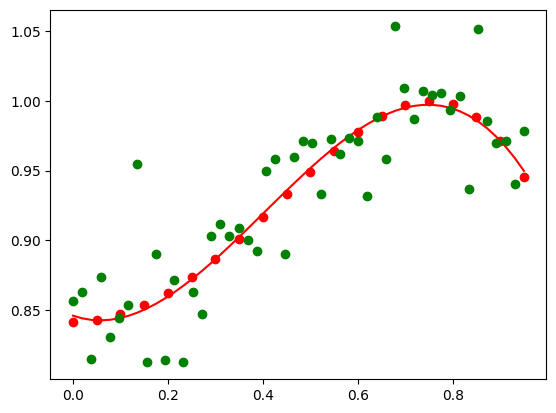

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def actual_distribution():
    x=np.arange(0,1,0.05);
    y=np.sin(np.power(x,2)+1)
    return x,y

def add_noise(y_curve):
    mu=0
    sigma=0.03
    noise=np.random.normal(mu,sigma,len(y_curve))
    y_noise=y_curve+noise
    return y_noise

def numpy_poly_fitting(x,y,M):
    z=np.polyfit(x,y,M)
    f=np.poly1d(z)
    return f



#===============================================

print('start...')
#generate true data
x_true,y_true = actual_distribution()

#fit on the actual data
f=numpy_poly_fitting(x_true,y_true,M=3)
print('f:',f)
x_curve=np.linspace(x_true[0],x_true[-1],50)
y_curve=f(x_curve)

#add noise on the true data
y_noise=add_noise(y_curve)
x_noise=x_curve

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.show()
    

## 4.Fit the generated noisy data using the MAP as discussed in class.

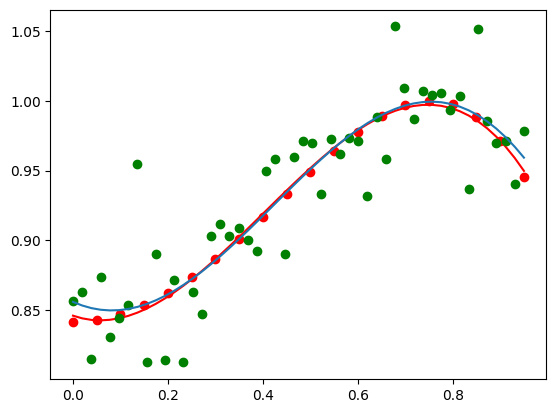

In [3]:
def my_MAP_fitting(x,y,M,alpha):
    N=len(x)
    sigma=0.03 #the noise sigma
    mx=np.zeros([N,M+1])
    vy=np.zeros([N,1])
    I=np.identity(M+1)
    Ialpha=alpha*sigma*I
    
    for n in range(0,N):
        for m in range(0,M+1):
            mx[n][m]=np.power(x[n],m)
        vy[n][0]=y[n]
    
    mxx=np.dot(mx.T,mx)
    imxx=linalg.inv(mxx+Ialpha)
    tmp=np.dot(imxx,mx.T)
    w=np.dot(tmp,vy)
    return w

def my_MAP_plot(x,w):
    M=len(w)-1
    N=len(x)
    
    mx=np.zeros([N,M+1])
    
    for n in range(0,N):
        for m in range(0,M+1):
            mx[n][m]=np.power(x[n],m)
            
    y=np.dot(mx,w)
    return x,y

#===============================================
#estimate the curve from the noisy data
w=my_MAP_fitting(x_noise,y_noise,M = 5,alpha = 0)#choose M,alpha
[x_est,y_est]=my_MAP_plot(x_curve,w)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est,y_est)
plt.show()

## 5.Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed w.

In [4]:
E = 0
for i in range(0, len(y_est)):
    e = abs(y_est[i] - y_noise[i])
    E = E + e
    
print('The total absolute error value E is', E)

The total absolute error value E is [1.11106152]


## 6.Display the estimated values of w

In [5]:
print('The estimated values of w is\n', w)

The estimated values of w is
 [[ 0.85580089]
 [-0.15262654]
 [ 0.97072238]
 [-0.17373695]
 [-1.0185905 ]
 [ 0.45362377]]


## 7.Experiment with your code by changing M and alpha (the coefficient of the regularization/prior term) to various values, and then show the plots. On each the plot, you must show the values of M and alpha.

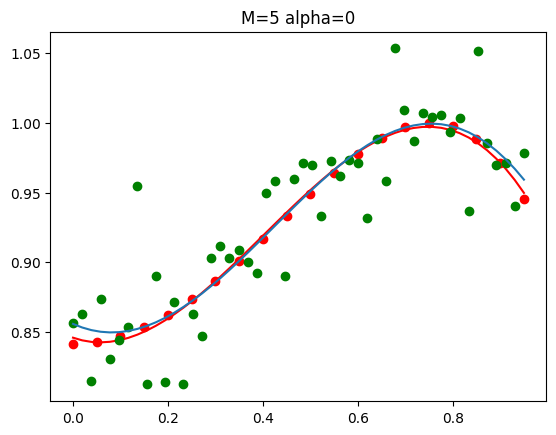

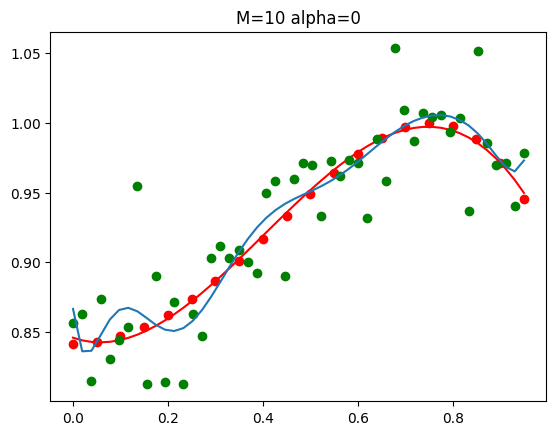

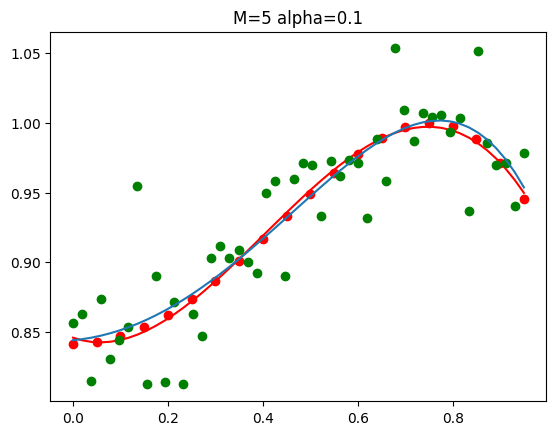

In [7]:
#estimate the curve from the noisy data
w=my_MAP_fitting(x_noise,y_noise,M=5,alpha=0)#choose M,alpha
[x_est,y_est]=my_MAP_plot(x_curve,w)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est,y_est)
plt.title('M=5 alpha=0')
plt.show()

#estimate the curve from the noisy data
w=my_MAP_fitting(x_noise,y_noise,M=10,alpha=0)#choose M,alpha
[x_est1,y_est1]=my_MAP_plot(x_curve,w)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est1,y_est1)
plt.title('M=10 alpha=0')
plt.show()

#estimate the curve from the noisy data
w=my_MAP_fitting(x_noise,y_noise,M=5,alpha=0.1)#choose M,alpha
[x_est2,y_est2]=my_MAP_plot(x_curve,w)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est2,y_est2)
plt.title('M=5 alpha=0.1')
plt.show()


## 8.From the experiment in #7, discuss how M and alpha influence on the fitting accuracy.

When the M is larger, the fitting curve will be overfitting. When we add the parameter alpha, the overfitting will be reduced. 

# <center>Part 2: BASIS FUNCTION

## 1.Generate 50 2D-data points using the following function:$y=sin(x^2+1)$

## 2.Add Gaussian random noise to the data

start...
f:          3         2
-0.9384 x + 1.133 x - 0.1204 x + 0.8459


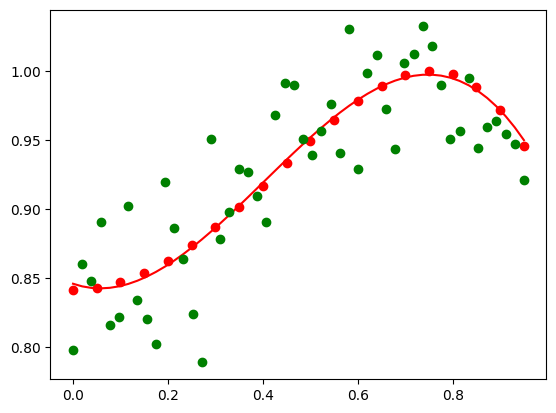

In [37]:
#delete all variables
%reset -f

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def actual_distribution():
    x=np.arange(0,1,0.05);
    y=np.sin(np.power(x,2)+1)
    return x,y

def add_noise(y_curve):
    mu=0
    sigma=0.03
    noise=np.random.normal(mu,sigma,len(y_curve))
    y_noise=y_curve+noise
    return y_noise

def numpy_poly_fitting(x,y,M):
    z=np.polyfit(x,y,M)
    f=np.poly1d(z)
    return f

#===============================================

print('start...')
#generate true data
x_true,y_true = actual_distribution()

#fit on the actual data
f=numpy_poly_fitting(x_true,y_true,M=3)
print('f:',f)
x_curve=np.linspace(x_true[0],x_true[-1],50)
y_curve=f(x_curve)

#add noise on the true data
y_noise=add_noise(y_curve)
x_noise=x_curve

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.show()

## 3.Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class.

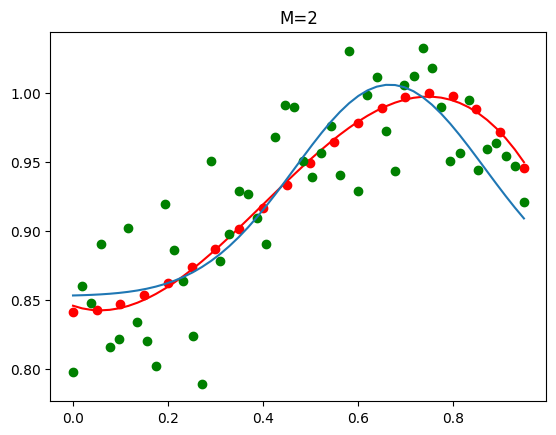

In [64]:
def Gaussian_basis_Func(x,mu,s):
    G = np.exp(-np.power((x-mu),2)/(2*s*s))
    return G

def my_G_B_FUNC_fitting(x,y,s,M):
    N=len(x)
    mx=np.zeros([N,M+1])
    vy=np.zeros([N,1])
    fai=np.zeros([M+1,1])
    
    for n in range(0,N):
        for m in range(0,M+1):
            if m == 0:
                fai[0]=1
            else:
                mu = m/(M+1)
                fai[m]=Gaussian_basis_Func(x[n],mu,s)
            mx[n][m]=np.power(fai[m],1)
        vy[n][0]=y[n]
    
    mxx=np.dot(mx.T,mx)#矩阵相乘
    imxx=linalg.inv(mxx)#direct inverse calculation
    tmp=np.dot(imxx,mx.T)
    w=np.dot(tmp,vy)
    return w

def my_G_B_FUNC_plot(x,w,s):
    M=len(w)-1
    N=len(x)
    mx=np.zeros([N,M+1])
    fai=np.zeros([M+1,1])
    
    for n in range(0,N):
        for m in range(0,M+1):
            if m == 0:
                fai[0]=1
            else:
                mu = m/(M+1)
                fai[m]=Gaussian_basis_Func(x[n],mu,s)
            mx[n][m]=np.power(fai[m],1)
            
    y=np.dot(mx,w)
    return x,y

#===============================================

#estimate the curve from the noisy data
s = 0.2
w = my_G_B_FUNC_fitting(x_noise,y_noise,s,M=2)
[x_est,y_est] = my_G_B_FUNC_plot(x_curve,w,s)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est,y_est)
plt.title('M=2')
plt.show()

## 4.Show your results for different values of M that generate overfitting and underfitting curves.

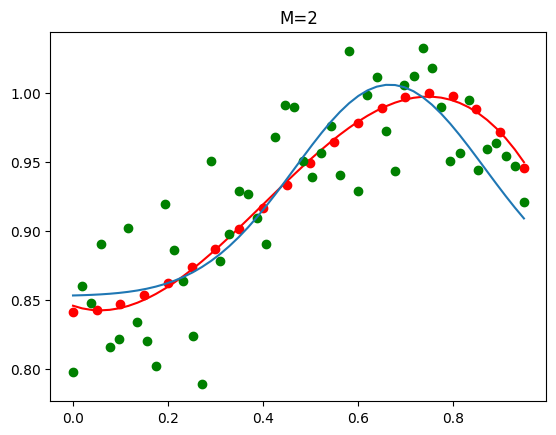

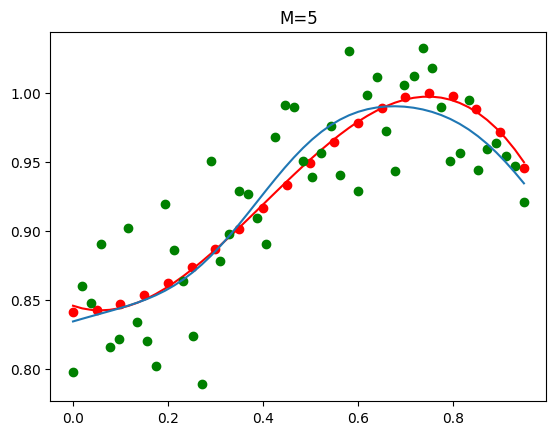

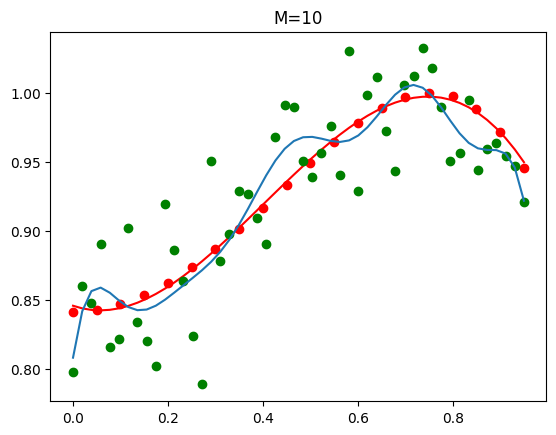

In [65]:
#estimate the curve from the noisy data
w = my_G_B_FUNC_fitting(x_noise,y_noise,s,M=2)
[x_est1,y_est1] = my_G_B_FUNC_plot(x_curve,w,s)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est1,y_est1)
plt.title('M=2')
plt.show()

#estimate the curve from the noisy data
w = my_G_B_FUNC_fitting(x_noise,y_noise,s,M=5)
[x_est2,y_est2] = my_G_B_FUNC_plot(x_curve,w,s)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est2,y_est2)
plt.title('M=5')
plt.show()

#estimate the curve from the noisy data
w = my_G_B_FUNC_fitting(x_noise,y_noise,s,M=10)
[x_est3,y_est3] = my_G_B_FUNC_plot(x_curve,w,s)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est3,y_est3)
plt.title('M=10')
plt.show()

## 5.Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves.

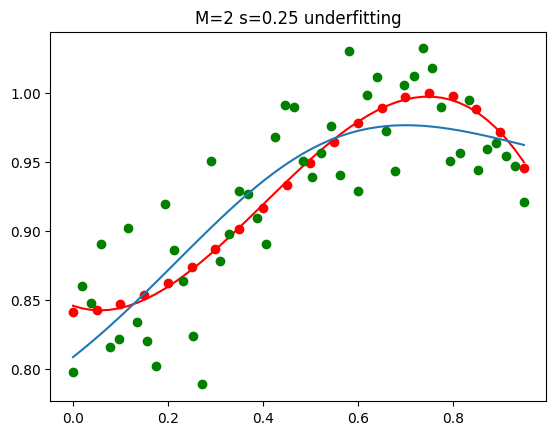

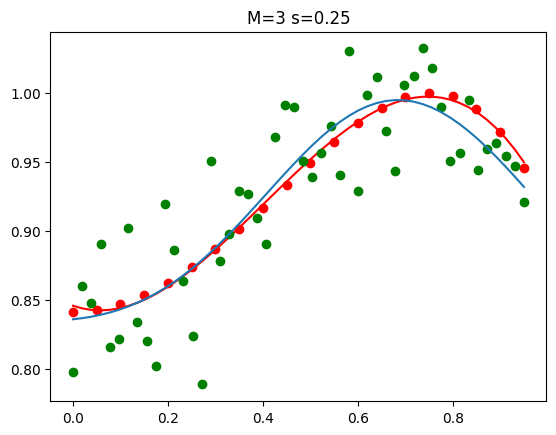

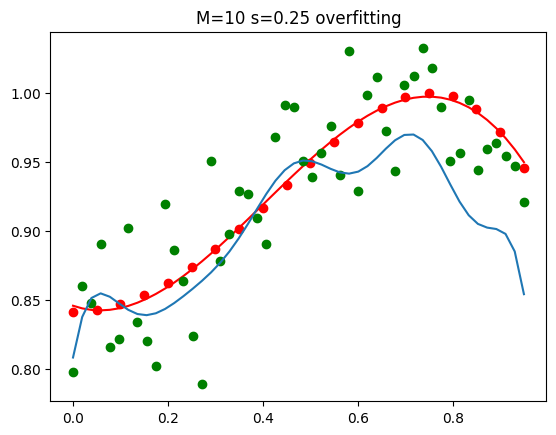

In [66]:
def Sigmoid_basis_Func(x,mu,s):
    S = 1/(1+np.exp((mu-x)/s))
    return S
    
def my_S_B_FUNC_fitting(x,y,s,M):
    N=len(x)
    mx=np.zeros([N,M+1])
    vy=np.zeros([N,1])
    fai=np.zeros([M+1,1])
    
    for n in range(0,N):
        for m in range(0,M+1):
            if m == 0:
                fai[m]=1
            else:
                mu = m/(M+1)
                fai[m]=Sigmoid_basis_Func(x[n],mu,s)
            mx[n][m]=np.power(fai[m],1)
        vy[n][0]=y[n]
    
    mxx=np.dot(mx.T,mx)#矩阵相乘
    imxx=linalg.inv(mxx)#direct inverse calculation
    tmp=np.dot(imxx,mx.T)
    w=np.dot(tmp,vy)
    return w

def my_S_B_FUNC_plot(x,w,s):
    M=len(w)-1
    N=len(x)
    mx=np.zeros([N,M+1])
    fai=np.zeros([M+1,1])
    
    for n in range(0,N):
        for m in range(0,M+1):
            if m == 0:
                fai[0]=1
            else:
                mu = m/(M+1)
                fai[m]=Sigmoid_basis_Func(x[n],mu,s)
            mx[n][m]=np.power(fai[m],1)
            
    y=np.dot(mx,w)
    return x,y

#===============================================

#estimate the curve from the noisy data
s=0.25
w = my_S_B_FUNC_fitting(x_noise,y_noise,s,M=2)
[x_est,y_est]= my_S_B_FUNC_plot(x_curve,w,s)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est,y_est)
plt.title('M=2 s=0.25 underfitting')
plt.show()

#estimate the curve from the noisy data
w = my_S_B_FUNC_fitting(x_noise,y_noise,s,M=3)
[x_est1,y_est1]= my_S_B_FUNC_plot(x_curve,w,s)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est1,y_est1)
plt.title('M=3 s=0.25')
plt.show()

#estimate the curve from the noisy data
w = my_S_B_FUNC_fitting(x_noise,y_noise,s,M=10)
[x_est2,y_est2]= my_S_B_FUNC_plot(x_curve,w,s)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est2,y_est2)
plt.title('M=10 s=0.25 overfitting')
plt.show()

## 6.Change the original curve function to $y=0.4345x^3-5.607x^2+16.78x-10.61$ , and use the sigmoid basis function to estimate the best curve fitting from the noisy data.

start...
f:         3         2
0.4345 x - 5.607 x + 16.78 x - 10.61


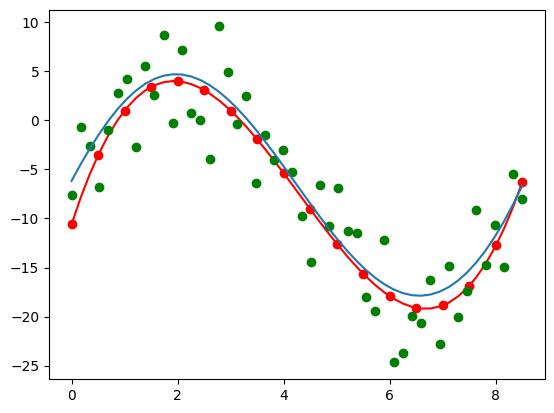

In [67]:
def actual_distribution_2():
    x=np.arange(0,9,0.5);
    y=0.4345*np.power(x,3)-5.607*np.power(x,2)+16.78*x-10.61
    return x,y

def add_noise(y_curve):
    mu=0
    sigma=4.0
    noise=np.random.normal(mu,sigma,len(y_curve))
    y_noise=y_curve+noise
    return y_noise

#===============================================

print('start...')
#generate true data
x_true,y_true = actual_distribution_2()

#fit on the actual data
f=numpy_poly_fitting(x_true,y_true,M=3)
print('f:',f)
x_curve=np.linspace(x_true[0],x_true[-1],50)
y_curve=f(x_curve)

#add noise on the true data
y_noise=add_noise(y_curve)
x_noise=x_curve

#estimate the curve from the noisy data
s = 5
w = my_S_B_FUNC_fitting(x_noise,y_noise,s,M=4)
[x_est,y_est]= my_S_B_FUNC_plot(x_curve,w,s)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est,y_est)
plt.show()


## 7.Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot. Also, discuss the advantages of these basis functions over polynomial functions.

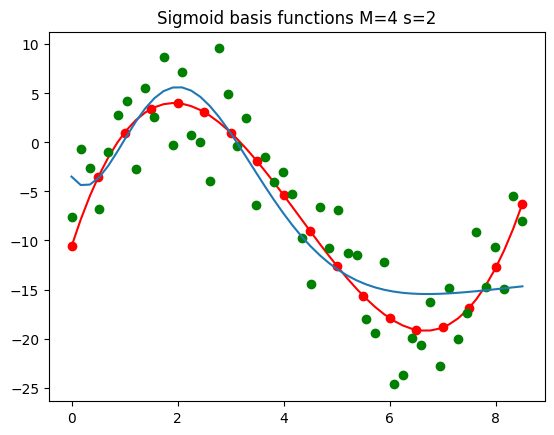

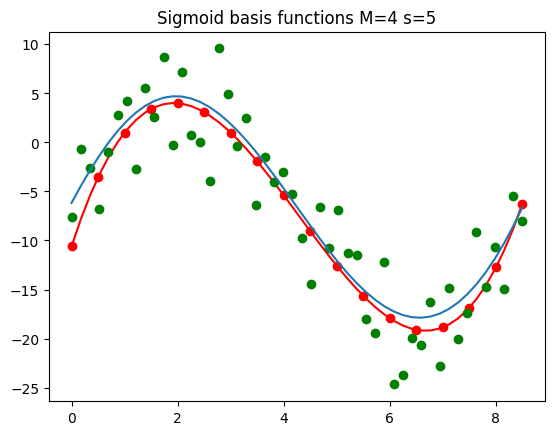

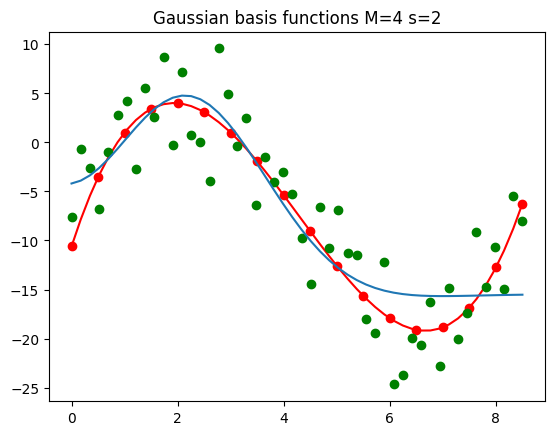

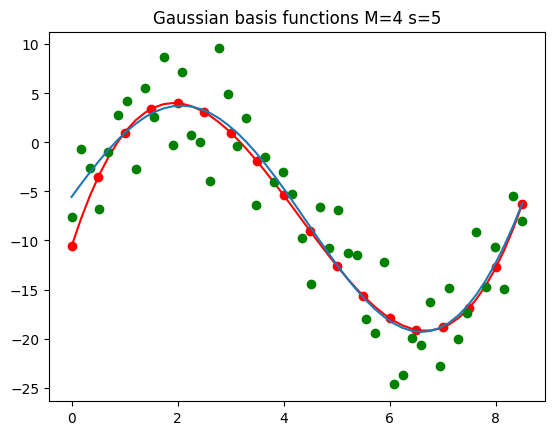

In [69]:
#estimate the curve from the noisy data
s = 2
w = my_S_B_FUNC_fitting(x_noise,y_noise,s,M=4)
[x_est1,y_est1]= my_S_B_FUNC_plot(x_curve,w,s)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est1,y_est1)
plt.title('Sigmoid basis functions M=4 s=2')
plt.show()

#estimate the curve from the noisy data
s = 5
w = my_S_B_FUNC_fitting(x_noise,y_noise,s,M=4)
[x_est2,y_est2]= my_S_B_FUNC_plot(x_curve,w,s)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est2,y_est2)
plt.title('Sigmoid basis functions M=4 s=5')
plt.show()

#estimate the curve from the noisy data
s = 2
w = my_G_B_FUNC_fitting(x_noise,y_noise,s,M=4)
[x_est3,y_est3]= my_G_B_FUNC_plot(x_curve,w,s)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est3,y_est3)
plt.title('Gaussian basis functions M=4 s=2')
plt.show()

#estimate the curve from the noisy data
s = 5
w = my_G_B_FUNC_fitting(x_noise,y_noise,s,M=4)
[x_est4,y_est4]= my_G_B_FUNC_plot(x_curve,w,s)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est4,y_est4)
plt.title('Gaussian basis functions M=4 s=5')
plt.show()

The advantages of these basis functions over polynomial functions are as follow:
1. The polynomial function can be unstable numerically in the implementation.
2. It is easy to process a high dimensionality of input $\bar{x}$.
3. We can use basis function to express $\bar{x}$, which implies that we can transform the dimensionality of the problem.

# <center>Part 3: FULL BAYESIAN + PREDICTIVE DISTRIBUTION

## 1.Generate 50 2D-data points using the following function:$y=sin(x^2+1)$. Add Gaussian random noise to the data. Show the original curve line and the noisy data.

start...
f:          3         2
-0.9384 x + 1.133 x - 0.1204 x + 0.8459


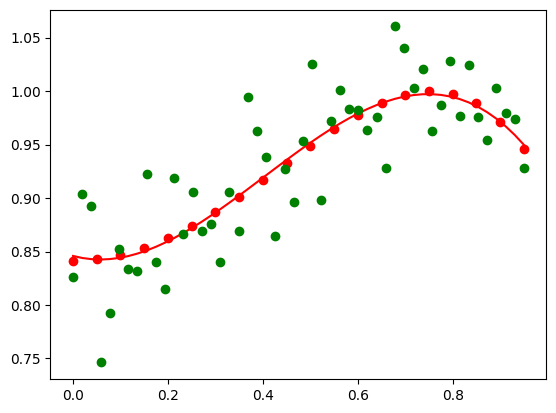

In [79]:
#delete all variables
%reset -f

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def actual_distribution():
    x=np.arange(0,1,0.05);
    y=np.sin(np.power(x,2)+1)
    return x,y

def add_noise(y_curve):
    mu=0
    sigma=0.04
    noise=np.random.normal(mu,sigma,len(y_curve))
    y_noise=y_curve+noise
    return y_noise

def numpy_poly_fitting(x,y,M):
    z=np.polyfit(x,y,M)
    f=np.poly1d(z)
    return f

#===============================================

print('start...')
#generate true data
x_true,y_true = actual_distribution()

#fit on the actual data
f=numpy_poly_fitting(x_true,y_true,M=3)
print('f:',f)
x_curve=np.linspace(x_true[0],x_true[-1],50)
y_curve=f(x_curve)

#add noise on the true data
y_noise=add_noise(y_curve)
x_noise=x_curve

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.show()

## 2.Compute w based on the full Bayesian inference (by using basis functions like discussed in class). Display the estimated values of w.

w is
 [[ 0.79837028]
 [ 0.03814874]
 [-0.01699526]
 [ 0.2050295 ]]


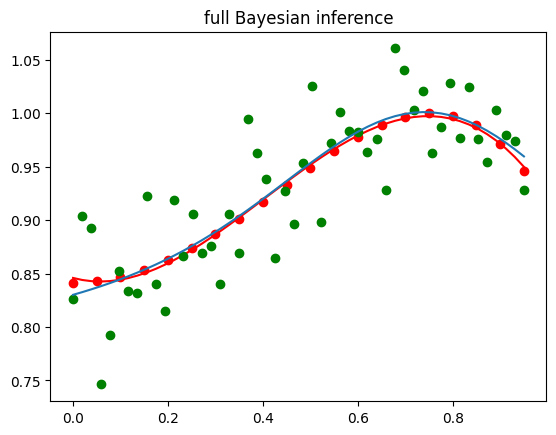

In [80]:
def Gaussian_basis_Func(x,mu,s):
    G = np.exp(-np.power((x-mu),2)/(2*s*s))
    return G

def full_Bayesian_inference(x,y,s,beta,M,alpha):
    N=len(x)
    mx=np.zeros([N,M+1])
    vy=np.zeros([N,1])
    fai=np.zeros([M+1,1])
    I=np.identity(M+1)
    Ialpha=alpha*I
    
    for n in range(0,N):
        for m in range(0,M+1):
            if m == 0:
                fai[0]=1
            else:
                mu = m/(M+1)
                fai[m]=Gaussian_basis_Func(x[n],mu,s)
            mx[n][m]=np.power(fai[m],1)
        vy[n][0]=y[n]
    
    mxx=np.dot(mx.T,mx)
    imxx=linalg.inv(beta*mxx+Ialpha)# covariance matrix 
    tmp=np.dot(imxx,mx.T)
    w=np.dot(beta*tmp,vy)
    return w

def full_Bayesian_plot(x,w,s):
    M=len(w)-1
    N=len(x)
    fai=np.zeros([M+1,1])
    mx=np.zeros([N,M+1])
    
    for n in range(0,N):
        for m in range(0,M+1):
            if m == 0:
                fai[0]=1
            else:
                mu = m/(M+1)
                fai[m]=Gaussian_basis_Func(x[n],mu,s)
            mx[n][m]=np.power(fai[m],1)            
    y=np.dot(mx,w)
    return x,y

#===============================================
#estimate the curve from the noisy data
s = 0.3
beta = 25 # 1/sigma
w = full_Bayesian_inference(x_noise,y_noise,s,beta,M=3,alpha=0.1)
[x_est,y_est] = full_Bayesian_plot(x_curve,w,s)
print('w is\n',w)
#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est,y_est)
plt.title('full Bayesian inference')
plt.show()

## 3.Experiment with your code by changing alpha and beta. Discuss the meaning of them with respect to the curve fitting results.

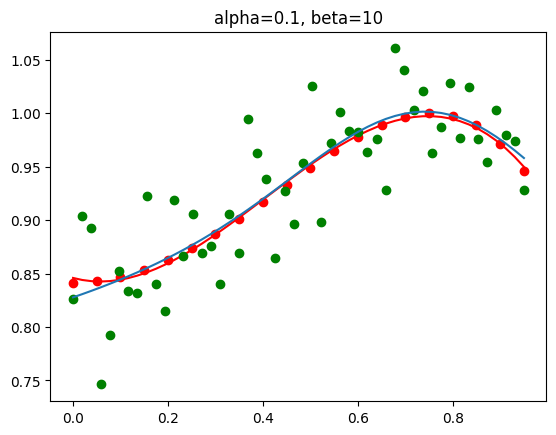

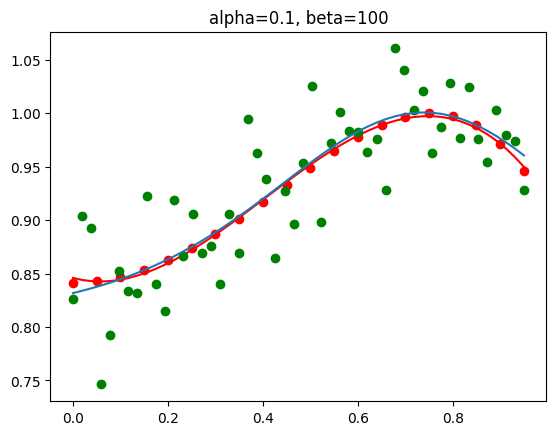

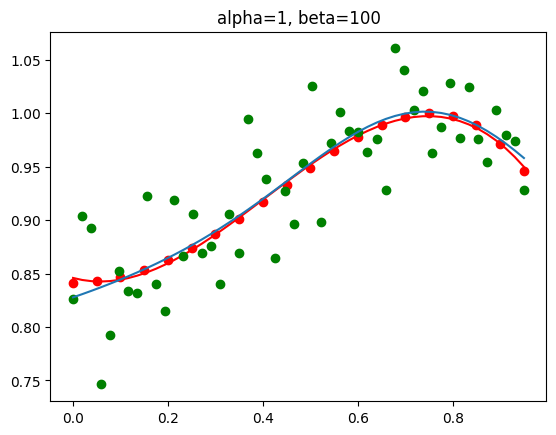

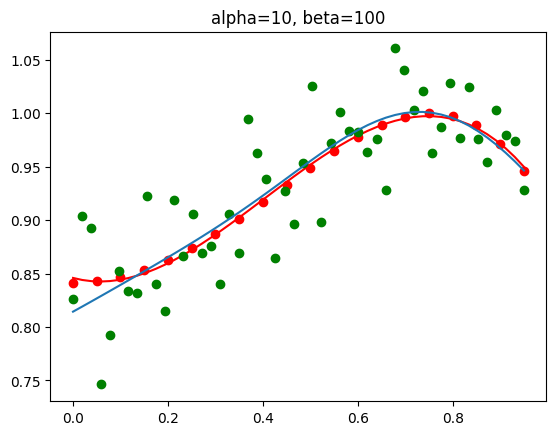

In [81]:
#Experiment by changing alpha and beta
w = full_Bayesian_inference(x_noise,y_noise,s,beta=10,M=3,alpha=0.1)
[x_est,y_est] = full_Bayesian_plot(x_curve,w,s)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est,y_est)
plt.title('alpha=0.1, beta=10')
plt.show()

#estimate the curve
w = full_Bayesian_inference(x_noise,y_noise,s,beta=100,M=3,alpha=0.1)
[x_est1,y_est1] = full_Bayesian_plot(x_curve,w,s)

#show plot1
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est1,y_est1)
plt.title('alpha=0.1, beta=100')
plt.show()

#estimate the curve
w = full_Bayesian_inference(x_noise,y_noise,s,beta=100,M=3,alpha=1)
[x_est2,y_est2] = full_Bayesian_plot(x_curve,w,s)

#show plot2
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est2,y_est2)
plt.title('alpha=1, beta=100')
plt.show()

#estimate the curve
w = full_Bayesian_inference(x_noise,y_noise,s,beta=100,M=3,alpha=10)
[x_est3,y_est3] = full_Bayesian_plot(x_curve,w,s)

#show plot3
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est3,y_est3)
plt.title('alpha=10, beta=100')
plt.show()

Alpha is related to the P(w). P(w) follows the Gaussian distribution and its variance is 1/alpha. Beta is related to the noise.

## 4.Show your best fitting

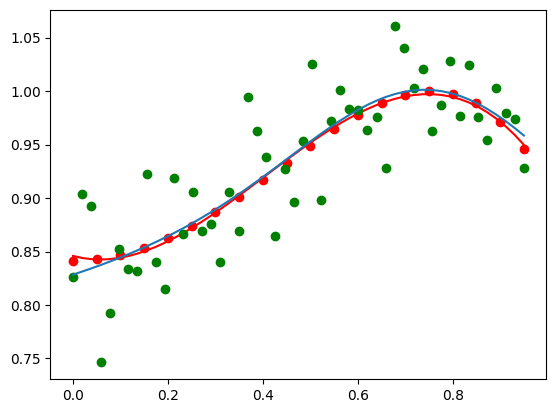

In [83]:
#best fitting
s = 0.3
beta = 25
w = full_Bayesian_inference(x_noise,y_noise,s,beta,M=3,alpha=0.2)
[x_est_best, y_est_best] = full_Bayesian_plot(x_curve,w,s)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est_best,y_est_best)
plt.show()

## 5.Explain how useful p(w|t) for the training and testing stages.

The p(w|t) give us the uncertainty information, which means how certain the predicted w_new is.It is important for decision making in the training stages, but also critical when we need to compare diferent prediction results in the testing stages.

## 6.Generate 50 2D-data points using the following function:$y=sin(x^2+1)$. Add Gaussian random noise to the data. Show the original curve line and the noisy data.

f:          3         2
-0.9384 x + 1.133 x - 0.1204 x + 0.8459


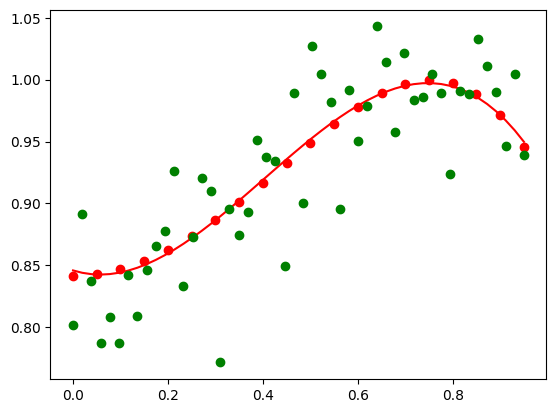

In [86]:
#generate true data
x_true,y_true = actual_distribution()

#fit on the actual data
f=numpy_poly_fitting(x_true,y_true,M=3)
print('f:',f)
x_curve=np.linspace(x_true[0],x_true[-1],50)
y_curve=f(x_curve)

#add noise on the true data
y_noise=add_noise(y_curve)
x_noise=x_curve

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.show()

## 7.Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data. Show your best prediction results for all 50 data one by one:

start...


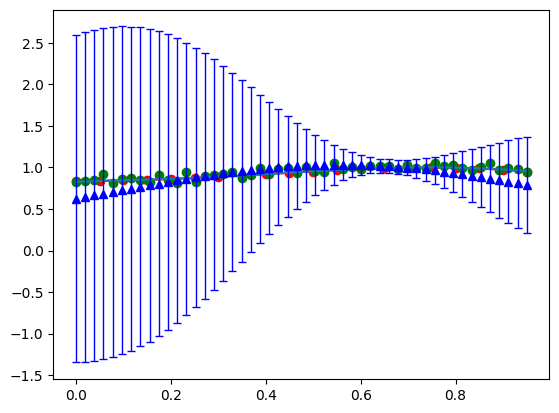

[34]
1


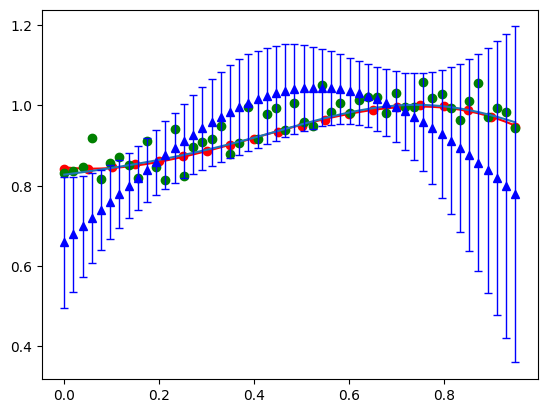

[34, 8]
2


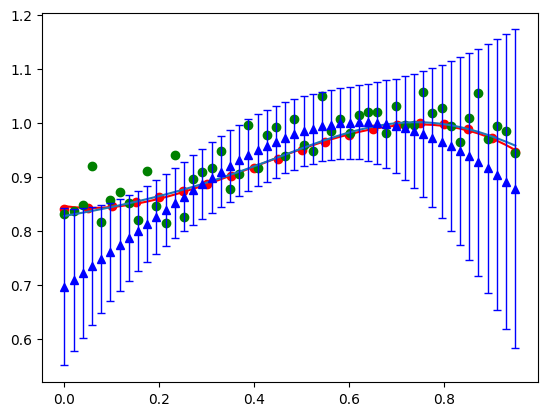

[34, 8, 21]
3


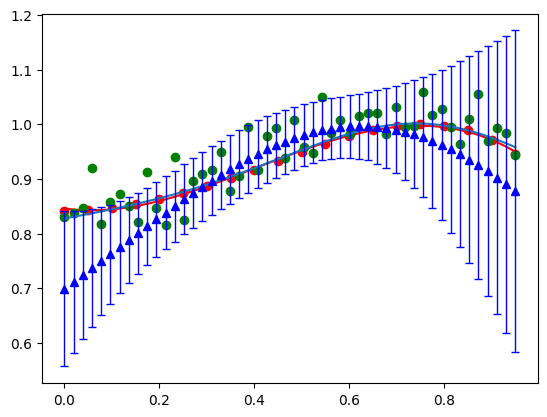

[34, 8, 21, 29]
4


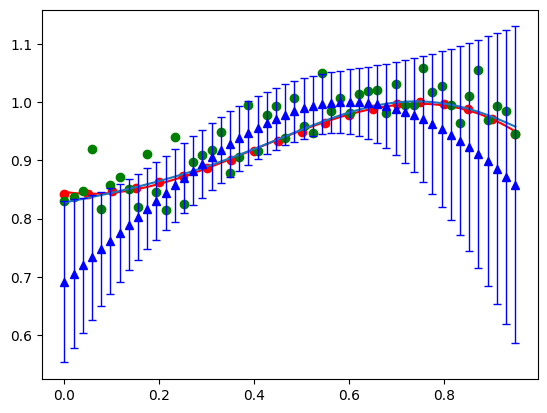

[34, 8, 21, 29, 23]
5


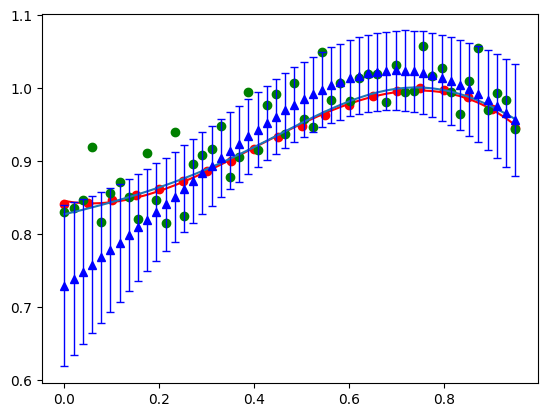

[34, 8, 21, 29, 23, 48]
6


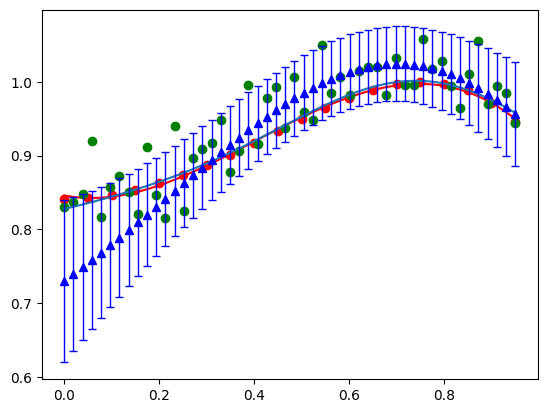

[34, 8, 21, 29, 23, 48, 40]
7


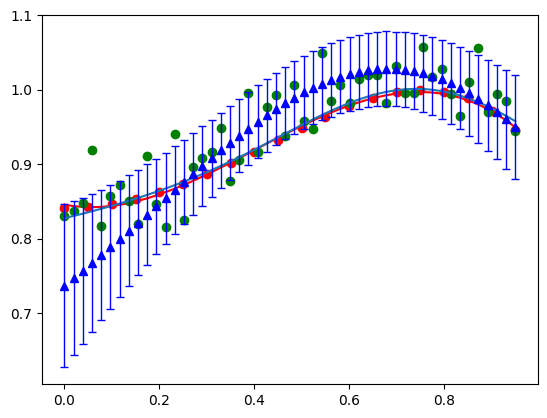

[34, 8, 21, 29, 23, 48, 40, 20]
8


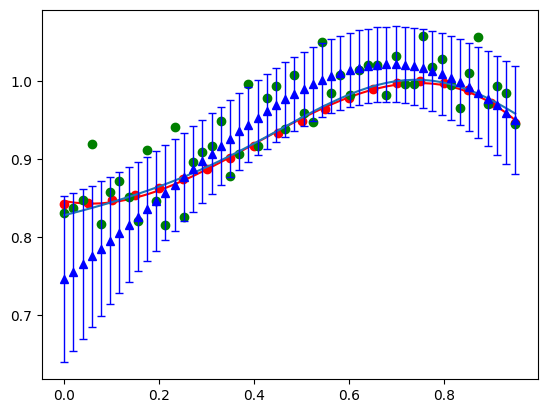

[34, 8, 21, 29, 23, 48, 40, 20, 31]
9


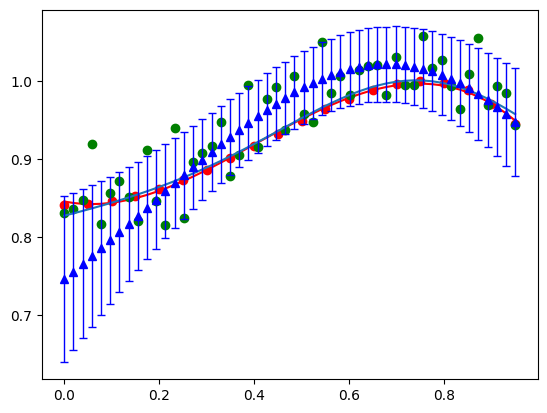

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22]
10


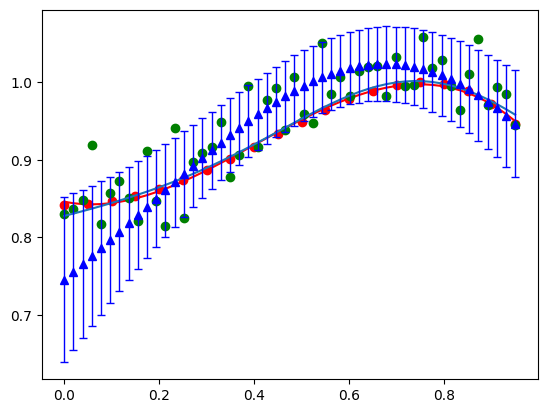

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23]
11


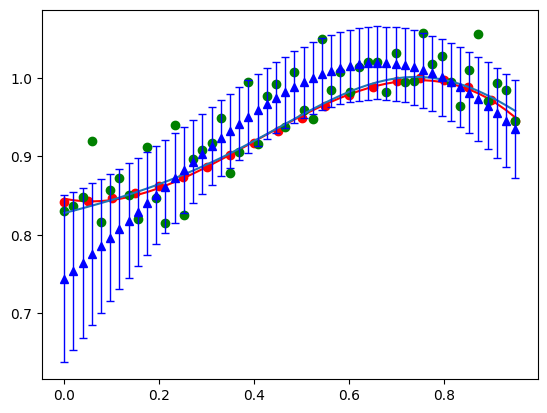

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43]
12


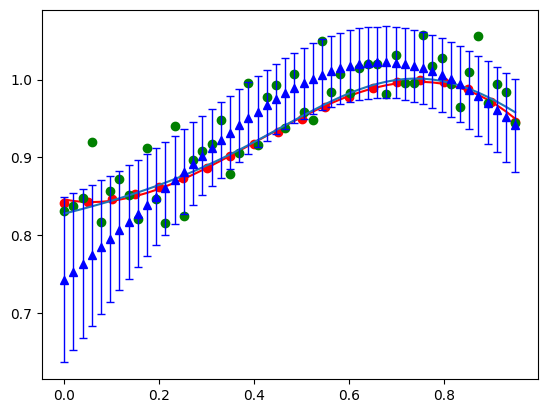

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41]
13


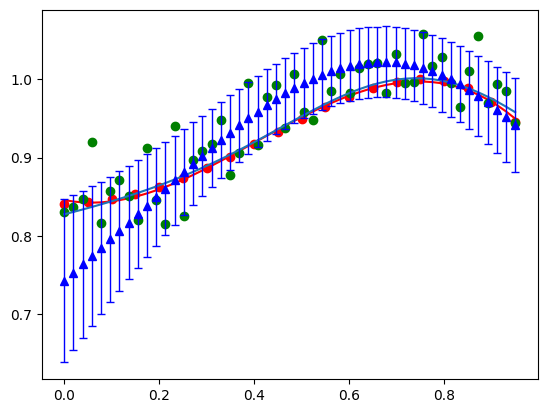

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33]
14


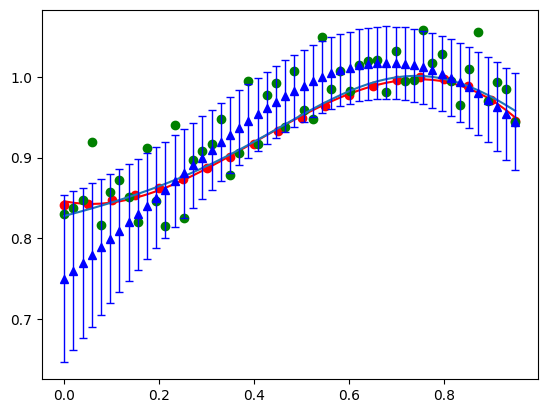

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27]
15


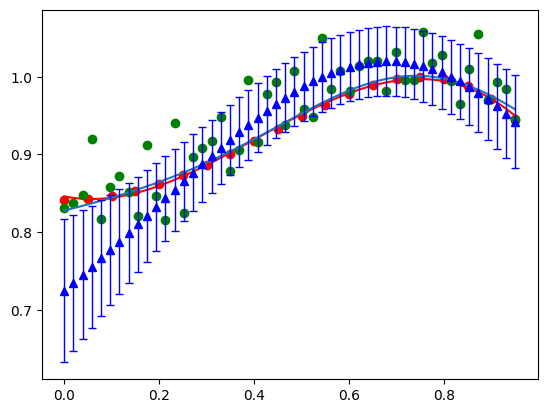

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13]
16


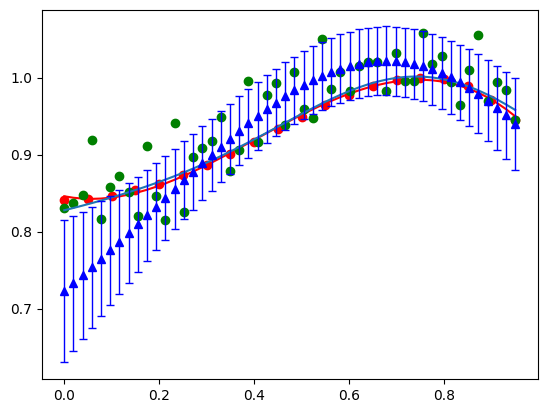

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25]
17


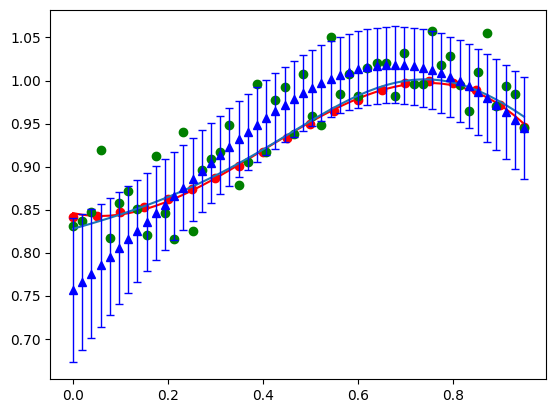

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12]
18


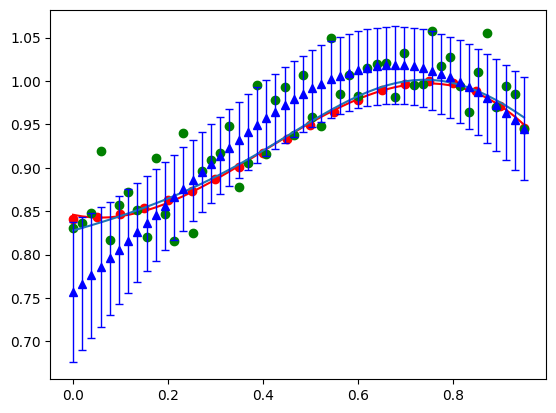

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14]
19


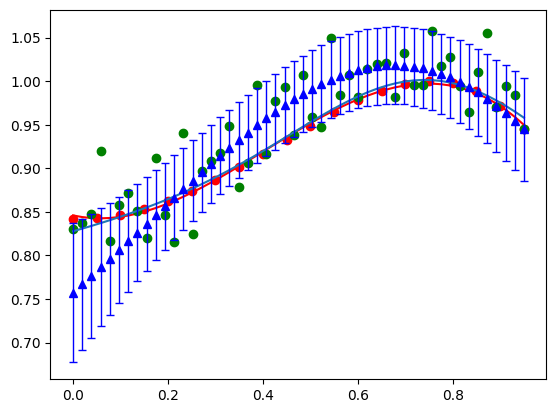

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16]
20


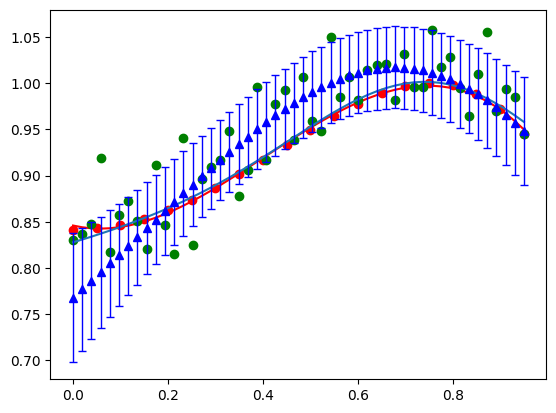

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7]
21


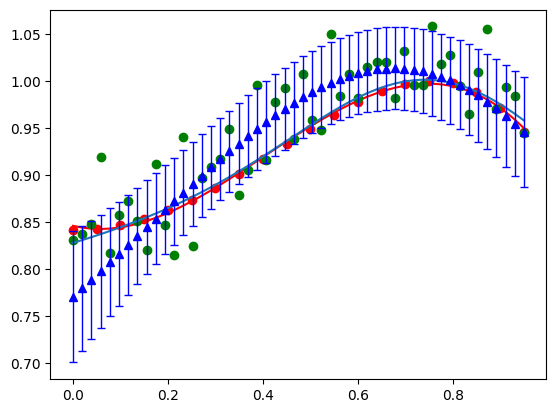

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35]
22


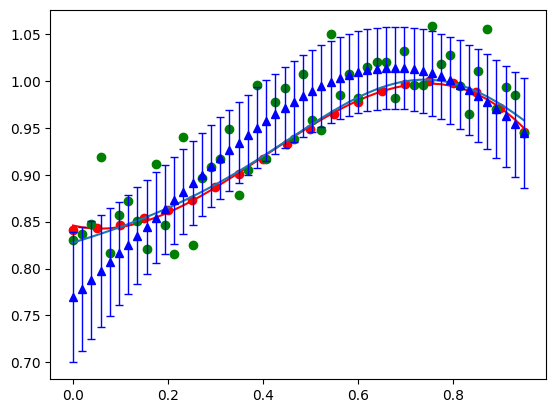

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22]
23


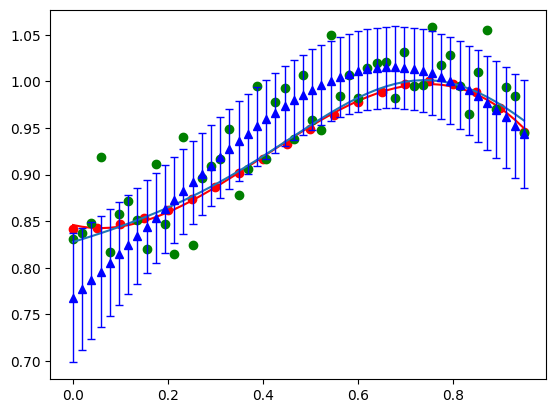

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25]
24


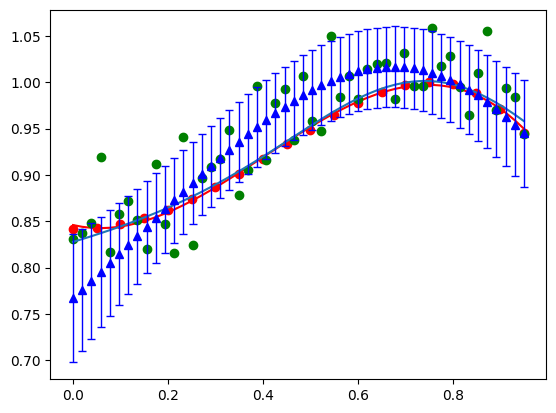

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36]
25


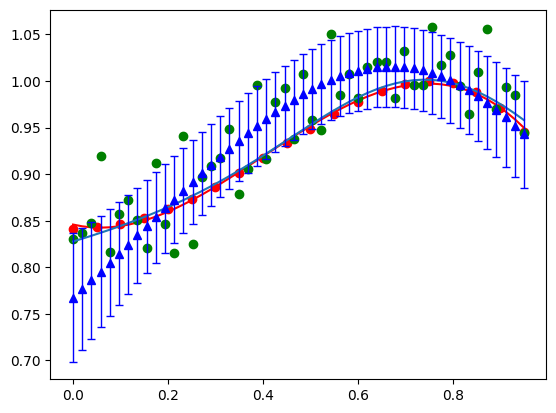

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38]
26


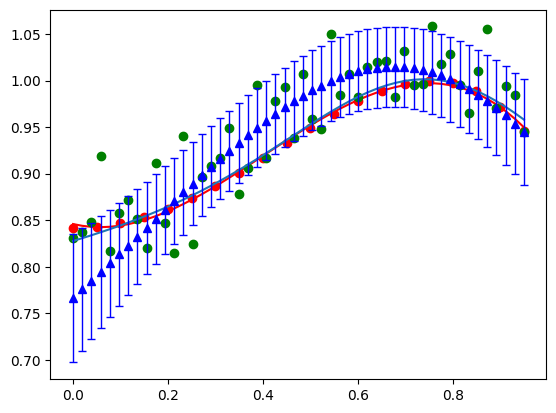

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19]
27


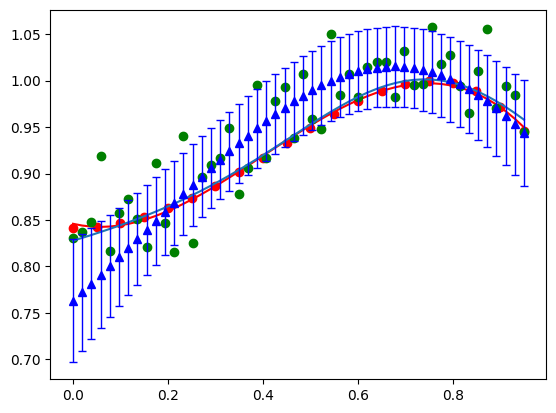

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10]
28


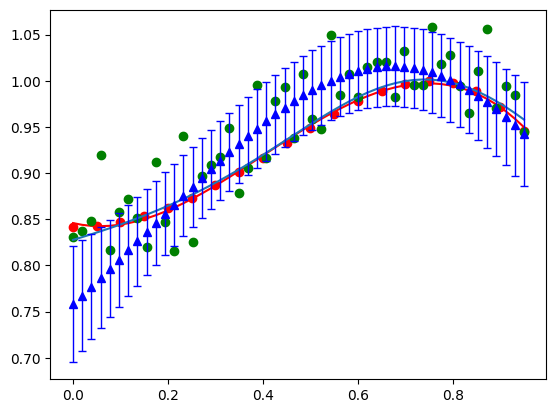

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8]
29


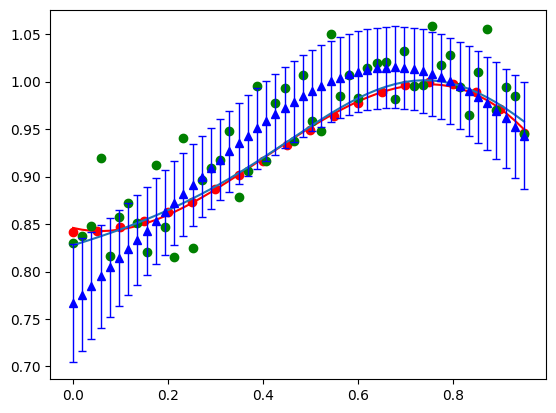

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12]
30


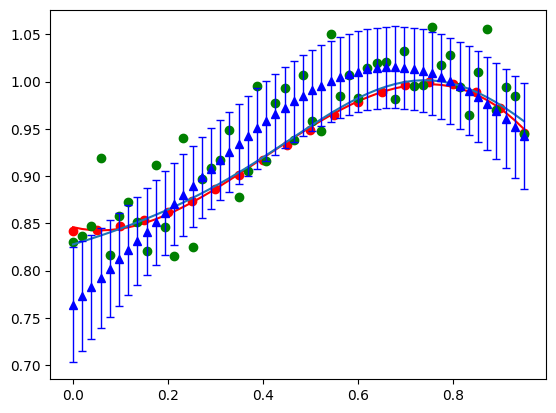

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10]
31


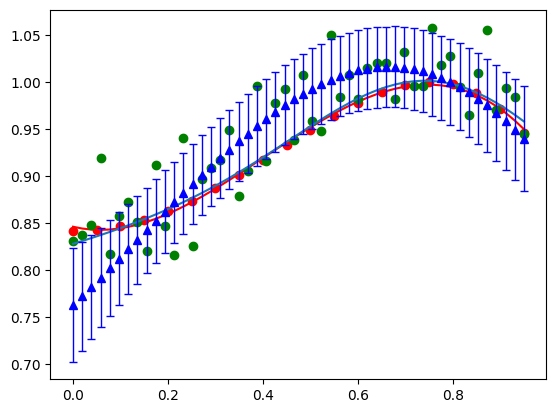

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20]
32


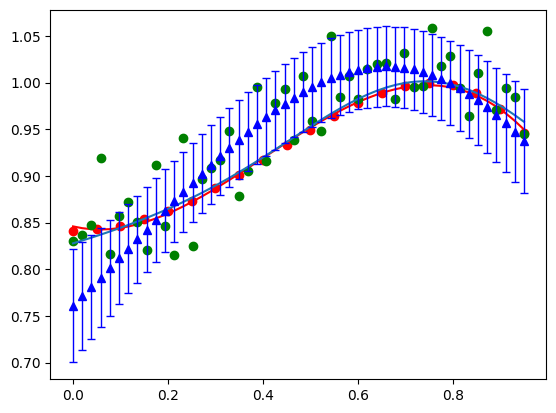

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20]
33


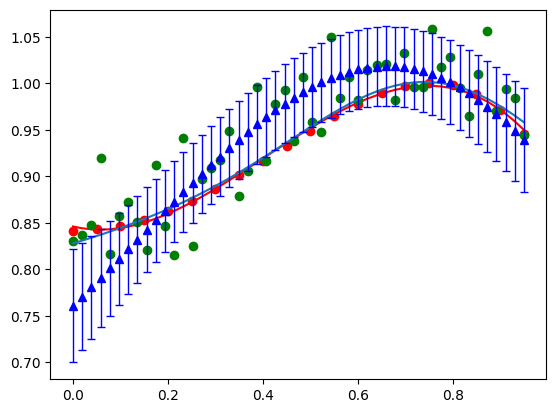

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36]
34


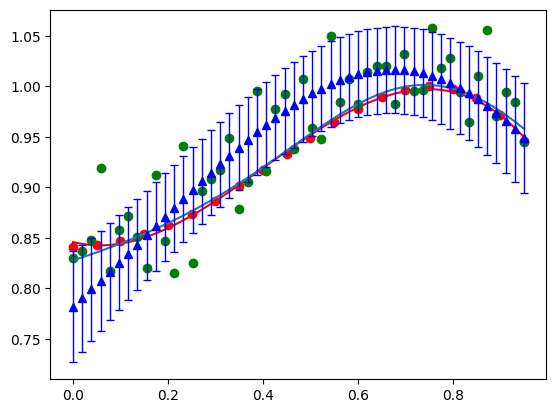

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2]
35


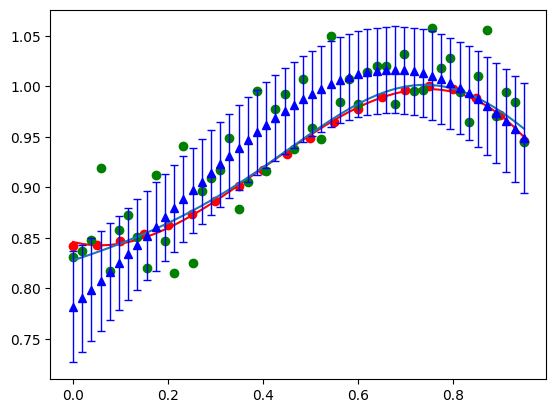

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2, 16]
36


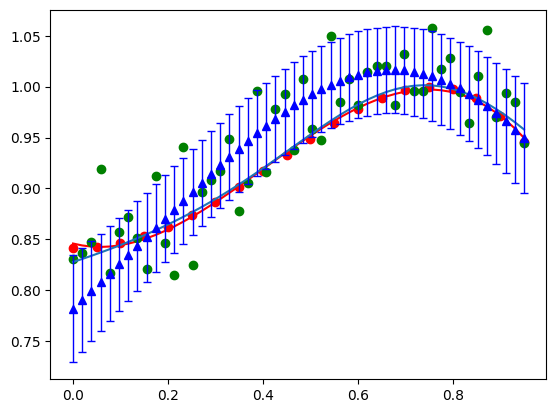

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2, 16, 4]
37


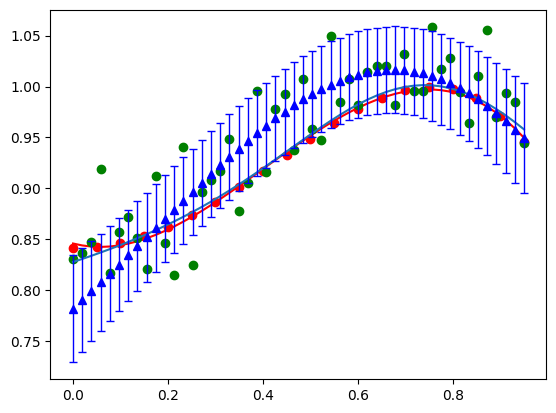

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2, 16, 4, 32]
38


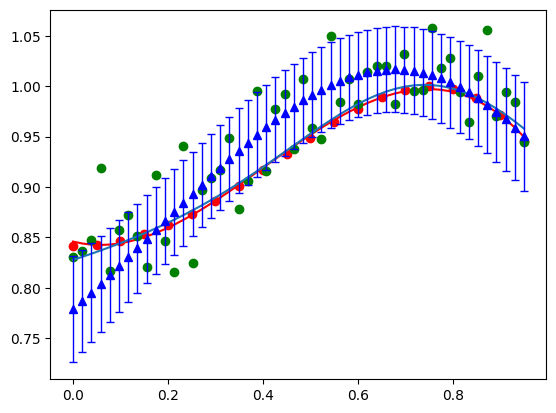

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2, 16, 4, 32, 13]
39


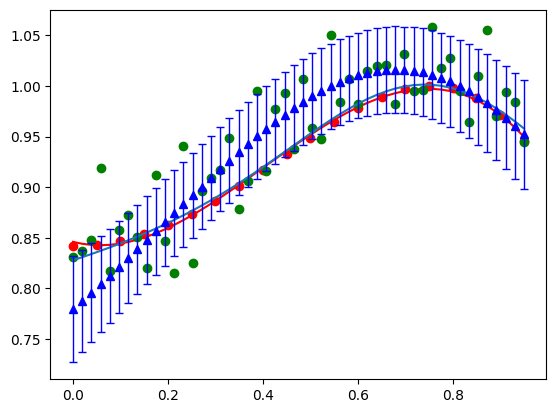

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2, 16, 4, 32, 13, 19]
40


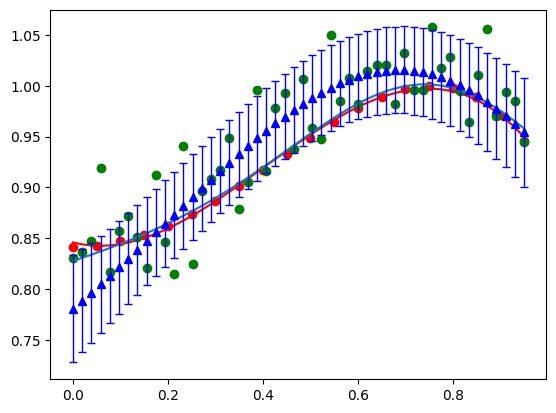

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2, 16, 4, 32, 13, 19, 21]
41


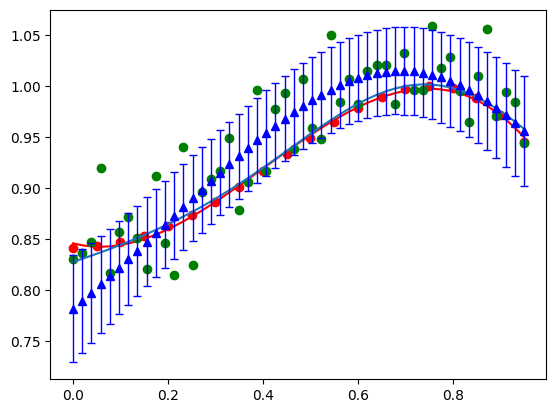

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2, 16, 4, 32, 13, 19, 21, 24]
42


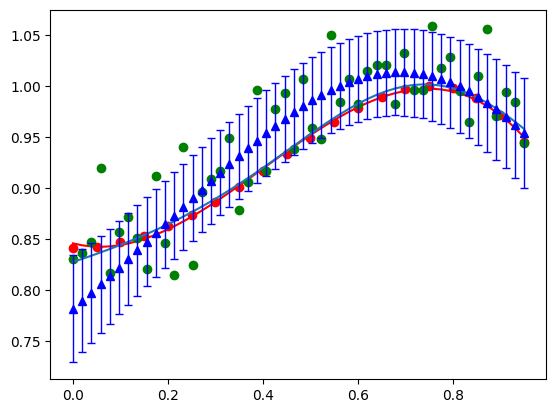

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2, 16, 4, 32, 13, 19, 21, 24, 37]
43


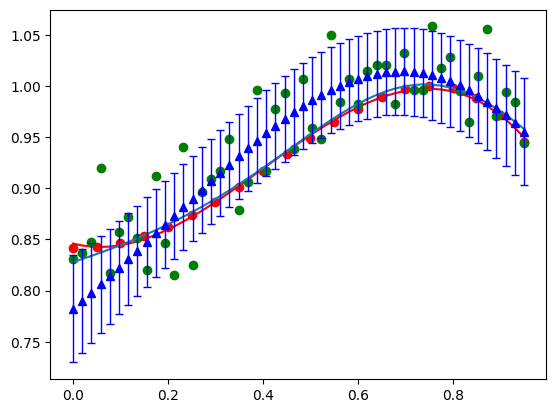

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2, 16, 4, 32, 13, 19, 21, 24, 37, 40]
44


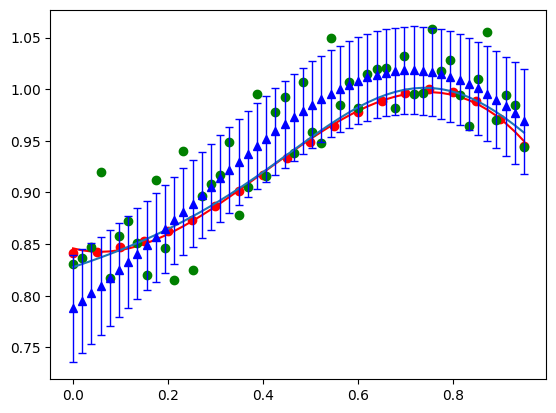

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2, 16, 4, 32, 13, 19, 21, 24, 37, 40, 45]
45


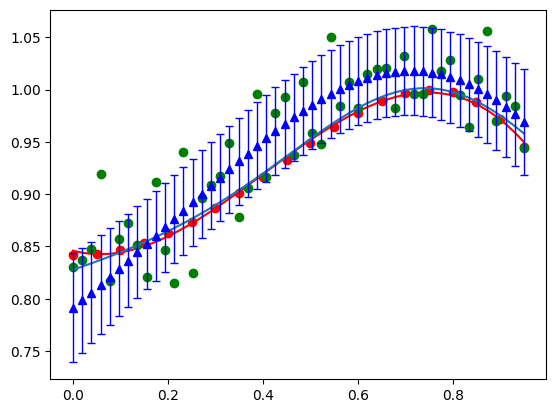

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2, 16, 4, 32, 13, 19, 21, 24, 37, 40, 45, 12]
46


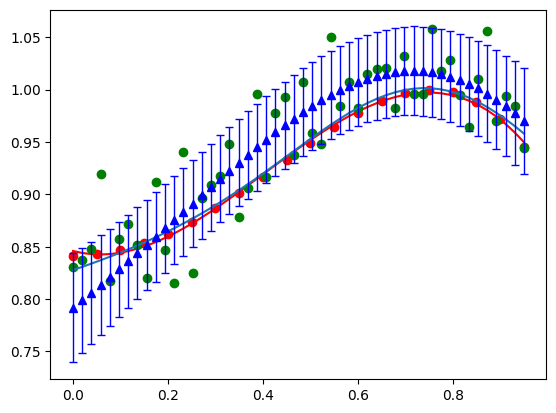

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2, 16, 4, 32, 13, 19, 21, 24, 37, 40, 45, 12, 19]
47


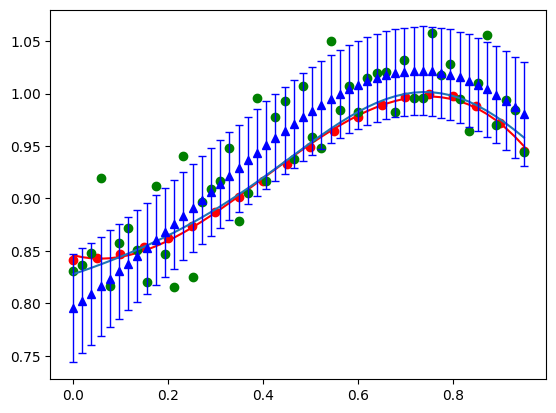

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2, 16, 4, 32, 13, 19, 21, 24, 37, 40, 45, 12, 19, 45]
48


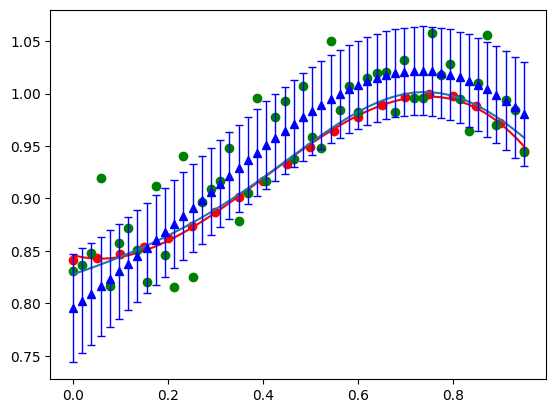

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2, 16, 4, 32, 13, 19, 21, 24, 37, 40, 45, 12, 19, 45, 15]
49


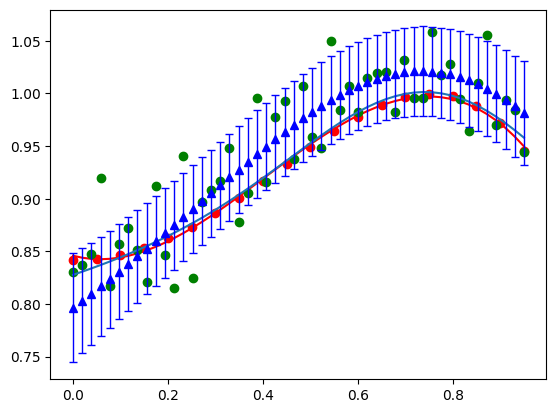

[34, 8, 21, 29, 23, 48, 40, 20, 31, 22, 23, 43, 41, 33, 27, 13, 25, 12, 14, 16, 7, 35, 22, 25, 36, 38, 19, 10, 8, 12, 10, 20, 20, 36, 2, 16, 4, 32, 13, 19, 21, 24, 37, 40, 45, 12, 19, 45, 15, 21]
50


In [87]:
def predictive_distribution(x,y,M,alpha,beta,s):
    N=len(x)
    mx=np.zeros([N,M+1])
    vy=np.zeros([N,1])
    I=np.identity(M+1)
    Ialpha=alpha*I
    
    for n in range(0,N):
        for m in range(0,M+1):
            if m == 0:
                mx[n][m]=1
            else:
                mu = m/(M+1)
                mx[n][m]=Gaussian_basis_Func(x[n],mu,s)
        vy[n][0]=y[n]
    #print('mx =',mx)
    mxx = np.dot(mx.T, mx)
    imxx = linalg.inv (beta * mxx + Ialpha)# covariance matrix 
    tmp=np.dot(imxx,mx.T)
    mn=np.dot(beta*tmp,vy)

    return imxx,mn

def predictive_distribution_plot(x,mn,SN,s,beta):
    M=len(mn)-1
    N=len(x)
    mx=np.zeros([N,M+1])
    
    for n in range(0,N):
        for m in range(0,M+1):
            if m == 0:
                mx[n][m]=1
            else:
                mu = m/(M+1)
                mx[n][m]=Gaussian_basis_Func(x[n],mu,s)         
    M_star = np.zeros([50,1])
    S_star = np.zeros(50)
    for i in range(N):
        M_star[i] = np.dot(mx[i], mn)
        S_star[i] = 1/beta + np.dot(np.dot(mx[i],SN),mx[i].T)
    return S_star, M_star 
#===============================================
print('start...')

#set parameter
M=5
alpha=0.5
beta=25
s=0.4

#generate true data
x_true,y_true = actual_distribution()

#fit on the actual data
f=numpy_poly_fitting(x_true,y_true,M=3)
#print('f:',f)
x_curve=np.linspace(x_true[0],x_true[-1],50)
y_curve=f(x_curve)

#add noise on the true data
y_noise=add_noise(y_curve)
x_noise=x_curve

#predictive the curve from the noisy data
x_noise_tmp = []
y_noise_tmp = []
tt = []
for i in range(0, len(x_noise)):
    t = np.random.randint(0,50)
    tt.append(t)

    x_noise_tmp.append(x_noise[t])
    y_noise_tmp.append(y_noise[t])

    imxx, mn = predictive_distribution(x_noise_tmp, y_noise_tmp, M, alpha, beta, s)
    S_star, M_star =  predictive_distribution_plot(x_noise, mn, imxx, s, beta)
 
    
    y_est_list = []
    for i in range (0,len(M_star)):
        y_est_list.append(M_star[i][0])
   
    #show plot
    plt.plot(x_true,y_true,'ro')
    plt.plot(x_curve,y_curve,'red')
    plt.plot(x_noise,y_noise,'go')
    plt.plot(x_est,y_est)
    plt.errorbar(x_noise, y_est_list, yerr = S_star, fmt = 'b^', ecolor = 'blue',elinewidth = 1, capsize = 3)
    plt.show()
    print(tt)
    print(len(tt))
    


## 8.Explain why the predictive distribution is better than the original form of the full Bayesian inference.

In the full bayesian inference, we can get p(w|t). However we are more interested to the t_new and its probability p(t_new|t), which can get through predictive distribution. Therefore the predictive distribution is better.

## 9.Discuss the differences between p(t_new|t) and p(w|t).

The p(w|t) is posterior probability distribution of the parameter w, which means the certainty about the curve we fitting by the dataset. In the Bayesian linear regression problem, we first solve p(w|t) by training the dataset. Then the posterior probability distribution of the parameter w is used to predict the new data, which is p(t_new|t). The p(t_new|t) is the distribution about the data rather than the parameter w.

# <center>Part 4: CLASSIFICATION USING FULL BAYESIAN 
# <center>+ 
# <center>PREDICTIVE DISTRIBUTION

## 1.This is an example code to generate classification data of two classes

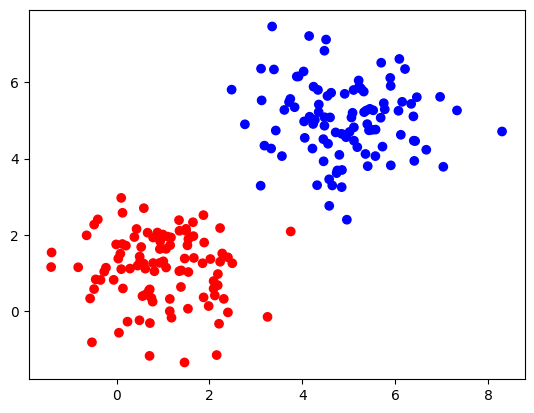

In [88]:
#delete all variables
%reset -f

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

N1 = 100
N2 = 100
K = 2
sigma = 1.0

mean = (1, 1)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5, 5)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

T = 0 * np.ones([len(X),K])
for n in range(0,len(X)):
    if(n<len(X1)):
        T[n][0] = 1
    if(n>=N1 and n<len(X1)+len(X2)):
        T[n][1] = 1
T = T.astype(int)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

## 2.Based on the code above, generate data similar to:

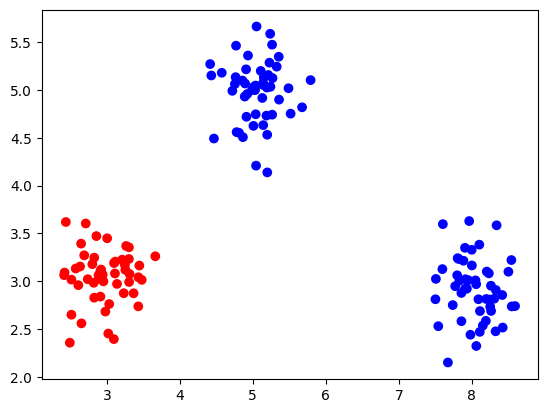

In [89]:
#delete all variables
%reset -f

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import linalg

point_num = 50
N1 = point_num
N2 = point_num
N3 = point_num
K = 2
sigma = 0.1

mean = (3, 3)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5, 5)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

mean = (8, 3)
cov = [[sigma, 0], [0, sigma]]
X3 = np.random.multivariate_normal(mean, cov, N3)
c3 = ['blue'] * len(X3)

X = np.concatenate((X1, X2, X3))
color = np.concatenate((c1, c2, c3))

T = 0 * np.ones([len(X),K])
for n in range(0,len(X)):
    if(n<len(X1)):
        T[n][0] = 1
    if(n>=N1 and n<len(X1)+len(X2)+len(X3)):
        T[n][1] = 1
        
T = T.astype(int)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

## 3.Implement the predictive distribution, where the output is a decision whether a given point belongs to C1 or C2. Based in the generated data and your implementation, compute the probability map:

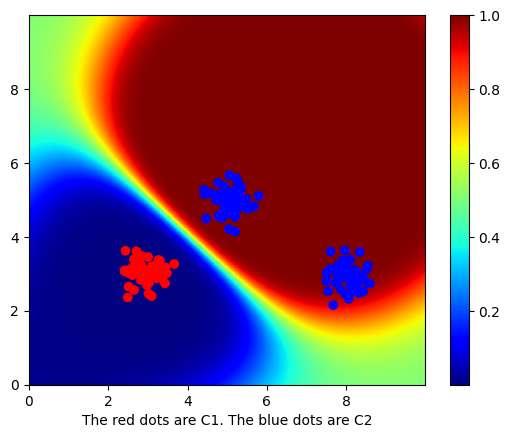

In [90]:
def Gaussian_basis_Func_2D(x, mu, s):
    G = np.exp(-((x[0] - mu) ** 2+(x[1] - mu) ** 2) / (2 * s ** 2))
    return G

def get_sigmoid(a):
    sigmoid = 1 / (1 + np.exp(-a))
    return sigmoid

def bayesian_classify(X, T, M, alpha):
    N = len(X)
    Phi = np.zeros([N, M])
    t = np.zeros([N, 1])
    w = np.zeros([M, 1])
    vy = np.zeros([N, 1])
    R = np.zeros([N, N])
    s0 = alpha * np.identity(M) 
    for n in range(N):
        for m in range(M):
            mu = 10 * m / M
            Phi[n][m] = np.exp(-(np.power((X[n][0] - mu), 2) + np.power((X[n][1]-mu), 2))/2/4)
        t[n][0] = T[n][1]
        
    for n in range(0, 100):
        for i in range(0, N):
            vy[i][0] = get_sigmoid(np.dot(w.T, Phi[i, :]))
            R[i][i] = vy[i][0] * (1 - vy[i][0])
        gE = np.dot(alpha * np.identity(M), w) + np.dot(Phi.T, vy - t)
        H = s0 + np.dot(np.dot(Phi.T, R), Phi)
        S = linalg.inv(H)
        w = w - np.dot(S, gE)
        
    return w, H

def pred_classify(w, x, H):
    phi = np.zeros([M, 1])
    for m in range(M):
        mu = 10 * m / M
        phi[m][0] = np.exp(-(np.power((x[0]-mu), 2) + np.power((x[1]-mu), 2))/2/4)
    
    mu_a = np.dot(w.T, phi)
    garma_a2 = np.dot(np.dot(phi.T, H), phi)
    k_a = np.power((1 + math.pi / 8 * garma_a2), 0.5) 
    p = get_sigmoid( mu_a / k_a)
    return p
    
#===============================================

s = 0.5
M = 3
alpha = 0.001
x_size = 10
y_size = 10
num = 100
plane = np.zeros([num * x_size, num * y_size])
xx = np.zeros([num * x_size, num * x_size])
yy = np.zeros([num * y_size, num * y_size])

w_new, H = bayesian_classify(X, T, M, alpha)

for n in range(0, num * x_size):
    for m in range(0, num * y_size):
        x = [n / num, m / num]
        xx[n][m] = n / num
        yy[n][m] = m / num
        p = pred_classify(w_new, x, H)
        plane[n][m] = p

fig = plt.figure()
ax = fig.add_subplot(111)
c = ax.pcolormesh(xx,yy,plane,cmap='jet')
fig.colorbar(c)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.xlabel('The red dots are C1. The blue dots are C2')
plt.show()

## 4.Ask the user to enter any new value of x, and your task is to provide the decision whether it belongs to C1 or C2, and its uncertainty information.


In [91]:
x = np.zeros([2, 1])
print('Input your x')
x[0] = input('Input x axis:')
x[1] = input('Input y axis:')

Input your x
Input x axis:2
Input y axis:4


In [92]:
p_new = pred_classify(w_new, x, H)
if p_new < 0.5:
    print('It belongs to C1!')
else:
    print('It belongs to C2!')
print('Uncertainty p_new is', p_new)

It belongs to C1!
Uncertainty p_new is [[0.00288539]]
